# Part 2: Sentiment Analysis

This notebook leverages several pre-trained sentiment and emotion models to better understand the underlying tone of the political tweets collected. Tweet text was cleaned in the `data_cleaning.ipynb` notebook.

### General setup

In [8]:
# Import packages 
import pandas as pd 
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Prepare data

In [10]:
# Read in data
data = pd.read_csv('./cleaned_tweet_data.csv')

# View first few rows of data
data.head(2)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the ...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...


In [11]:
# Check if there are any rows where with no text data
print('Number of Rows with No Text Data (after cleaning):', data['text_clean'].isnull().values.any().sum())

Number of Rows with No Text Data (after cleaning): 0


In [12]:
# Get number of tweets in dataset 
print('Number of Tweets:', len(data['text']))

Number of Tweets: 51336


From the basic data quality check we see that every cleaned tweet does contain text. For the sentiment analysis, we will be using the cleaned text in the `text_clean` column.

### Perform Sentiment Analysis

#### **VADER Sentiment Analysis**

In [13]:
# Load VADER sentiment model 
vader_sentiment = SentimentIntensityAnalyzer()

# Define function to return sentiment score for a series of text 
def vader_sentiment_scores(text):
  score = vader_sentiment.polarity_scores(text)
  return score['compound']

In [14]:
# function that bins sentiment into positive, negative, and neutral categories based on sentiment score 
def format_output(row):
  polarity = "neutral"
  if(row>= 0.05):
    polarity = "positive"
  elif(row<= -0.05):
    polarity = "negative"

  return polarity

In [15]:
# getting sentiment scores for corpus of text 
data['sentiment_score'] = data['text_clean'].apply(vader_sentiment_scores)

# getting sentiment bins for our data 
data['sentiment_bin'] = data['sentiment_score'].apply(format_output)

In [16]:
# examining data frame with sentiment scores and bins
data.head(3)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,...,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,...,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...,0.3818,positive
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,...,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the ...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...,0.7351,positive
2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,897218253826555905,JTaylorSkinner,Jenn Taylor-Skinner (she/her),...,25727,82402,False,43808,abrams,why did joe rogan send his little brother shan...,joe rogan send little brother shane interrupt ...,joe rogan send little brother shane interrupt ...,-0.2500,negative


#### **Pysentimiento Sentiment and Emotion Analysis**

In [ ]:
#!pip install pysentimiento

Making model instances for each pysentimiento model

In [13]:
### THIS TAKES A LONG TIME TO RUN 
from pysentimiento import create_analyzer

# loading transformer sentiment model 
analyzer = create_analyzer(task="sentiment", lang="en")

# loading transformer emotion model 
emotion_analyzer = create_analyzer(task="emotion", lang="en")

# loading transformer hate speech model 
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="en")


Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

loading configuration file config.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "joy": 1,
    "others": 0,
    "sadness": 2,
    "surprise": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-emotion-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

loading configuration file config.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "joy": 1,
    "others": 0,
    "sadness": 2,
    "surprise": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.txt from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/vocab.txt
loading file bpe.codes from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/bpe.codes
loading file added_tokens.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/added_tokens.json
loading file special_tokens_map.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/special_tokens_map.json
loading file tokenizer_config.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab

Downloading:   0%|          | 0.00/980 [00:00<?, ?B/s]

loading configuration file config.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/config.json
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/bertweet-hate-speech",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "hateful",
    "1": "targeted",
    "2": "aggressive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "aggressive": 2,
    "hateful": 0,
    "targeted": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute"

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at pysentimiento/bertweet-hate-speech.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/335 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.txt from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/vocab.txt
loading file bpe.codes from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/bpe.codes
loading file added_tokens.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/added_tokens.json
loading file special_tokens_map.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/special_tokens_map.json
loading file tokenizer_config.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--pysentimiento--bertweet-hate-speech/snapshots/8913cd6a2515f3e033c3b097f68d3bfb41079c54/tokenizer_config.json
Adding 

In [14]:
# getting output from transformer sentiment model 
def enhanced_sentiment_scores(text):
    score = analyzer.predict(text) 
    return score

# getting output from transformer emotion model 
def emotion_scores(text):
    score = emotion_analyzer.predict(text) 
    return score

# getting output from transformer hate speech model 
def hate_speech_scores(text):
    score = hate_speech_analyzer.predict(text) 
    return score

In [15]:
### THIS TAKES A LONG TIME TO RUN 

data['pysentimiento_sentiment'] = data['text_clean'].apply(enhanced_sentiment_scores)

data['pysentimiento_emotion'] = data['text_clean'].apply(emotion_scores)

data['pysentimiento_hate'] = data['text_clean'].apply(hate_speech_scores)

In [21]:
data['sentiment_probs'] = data['pysentimiento_sentiment'].apply(lambda x: x.probas)
data['sentiment_output'] = data['pysentimiento_sentiment'].apply(lambda x: x.output)

data['emotion_probs'] = data['pysentimiento_emotion'].apply(lambda x: x.probas)
data['emotion_output'] = data['pysentimiento_emotion'].apply(lambda x: x.output)

data['hate_probs'] = data['pysentimiento_hate'].apply(lambda x: x.probas)
data['hate_output'] = data['pysentimiento_hate'].apply(lambda x: x.output)

In [23]:
data = data.drop(columns=['pysentimiento_sentiment', 'pysentimiento_emotion', 'pysentimiento_hate'])

In [24]:
data.head(5)

,Unnamed: 0,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,in_reply_to_screen_name,...,topic_y,cleaned_text,sentiment_score,sentiment_bin,sentiment_output,sentiment_probs,emotion_output,_probs,hate_output,hate_probs
0,0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,NaN,NaN,...,abrams,Sharp words on guns in Shane Hazel to Stacey A...,0.3818,positive,"{'NEG': 0.8212317228317261, 'NEU': 0.174511402...",NEG,"{'others': 0.207327738404274, 'joy': 0.0029463...",disgust,"{'hateful': 0.006341646425426006, 'targeted': ...",[]
1,1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,NaN,NaN,...,abrams,Stacey Abrams won tonight She kept to the fact...,0.7351,positive,"{'NEG': 0.016344917938113213, 'NEU': 0.3160411...",POS,"{'others': 0.9740464687347412, 'joy': 0.014125...",others,"{'hateful': 0.01308343093842268, 'targeted': 0...",[]
2,2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,NaN,NaN,...,abrams,Why did Joe Rogan send his little brother Shan...,-0.2500,negative,"{'NEG': 0.39890310168266296, 'NEU': 0.59211242...",NEU,"{'others': 0.05201367661356926, 'joy': 0.00170...",disgust,"{'hateful': 0.07990611344575882, 'targeted': 0...",[]
3,3,2022-10-18 00:00:08,Viral handbag designer and EBONY Power100 Styl...,"['StaceyAbrams', 'BrandonBlackwood', 'EBONYMag']",[],[],1,8,NaN,NaN,...,abrams,Viral handbag designer and EBONY Powernumber S...,0.7184,positive,"{'NEG': 0.0015979005256667733, 'NEU': 0.925578...",NEU,"{'others': 0.9076645970344543, 'joy': 0.080004...",others,"{'hateful': 0.0050714933313429356, 'targeted':...",[]
4,4,2022-10-18 00:00:11,THE MOST DANGEROUS THING FACING GEORGIA IS 4 M...,[],[],[],212,528,NaN,NaN,...,kemp,THE MOST DANGEROUS THING FACING GEORGIA IS num...,0.1776,positive,"{'NEG': 0.9775214195251465, 'NEU': 0.018825154...",NEG,"{'others': 0.007493030279874802, 'joy': 0.0018...",fear,"{'hateful': 0.009111088700592518, 'targeted': ...",[]


In [25]:
# Save to csv file
data.to_csv('data_with_sentiment.csv', index=False)

In [20]:
sentiment_df = pd.read_csv('data_with_sentiment.csv')
sentiment_df['day'] = pd.to_datetime(sentiment_df['created_at']).dt.floor('d')
sentiment_df = sentiment_df[['created_at', 'day', 'topic', 'sentiment_probs', 'hate_probs', '_probs']]
sentiment_df = sentiment_df.rename(columns = {
    "sentiment_probs": "sentiment",
    "hate_probs": "hate",
    "_probs": "emotion",
})
sentiment_df

,created_at,day,topic_y,sentiment,hate,emotion
0,2022-10-18 00:00:00,2022-10-18,abrams,NEG,[],disgust
1,2022-10-18 00:00:01,2022-10-18,abrams,POS,[],others
2,2022-10-18 00:00:01,2022-10-18,abrams,NEU,[],disgust
3,2022-10-18 00:00:08,2022-10-18,abrams,NEU,[],others
4,2022-10-18 00:00:11,2022-10-18,kemp,NEG,[],fear
...,...,...,...,...,...,...
51331,2022-11-08 23:59:46,2022-11-08,abrams,NEG,[],others
51332,2022-11-08 23:59:54,2022-11-08,kemp,NEG,[],disgust
51333,2022-11-08 23:59:57,2022-11-08,abrams,NEU,[],others
51334,2022-11-08 23:59:57,2022-11-08,kemp,NEU,[],others


In [15]:
sentiment_df.groupby(['topic']).size()

topic_y
abrams                    32299
abrams, election            576
abrams, kemp               2228
abrams, kemp, election      780
election                   3726
kemp                      10518
kemp, election             1209
dtype: int64

In [7]:
sentiment_df.groupby(['topic', 'sentiment_probs']).size()

topic_y                 sentiment_probs
abrams                  NEG                17666
                        NEU                11539
                        POS                 3094
abrams, election        NEG                  190
                        NEU                  324
                        POS                   62
abrams, kemp            NEG                  922
                        NEU                 1141
                        POS                  165
abrams, kemp, election  NEG                  124
                        NEU                  541
                        POS                  115
election                NEG                 1060
                        NEU                 2192
                        POS                  474
kemp                    NEG                 5358
                        NEU                 4341
                        POS                  819
kemp, election          NEG                  453
                        NEU  

In [8]:
sentiment_df.groupby(['topic', 'hate_probs']).size()

topic_y                 hate_probs                           
abrams                  ['hateful', 'aggressive']                  235
                        ['hateful', 'targeted', 'aggressive']      272
                        ['hateful', 'targeted']                   2435
                        ['hateful']                               2246
                        ['targeted']                                20
                        []                                       27091
abrams, election        ['hateful', 'aggressive']                    1
                        ['hateful', 'targeted', 'aggressive']        2
                        ['hateful', 'targeted']                     23
                        ['hateful']                                 12
                        ['targeted']                                 1
                        []                                         537
abrams, kemp            ['aggressive']                               1
               

In [16]:
sentiment_df.groupby(['topic', '_probs']).size()

topic_y                 _probs  
abrams                  anger        2138
                        disgust     11217
                        fear          389
                        joy          1908
                        others      16311
                        sadness        86
                        surprise      250
abrams, election        anger          22
                        disgust       134
                        joy            27
                        others        388
                        surprise        5
abrams, kemp            anger         100
                        disgust       649
                        fear           24
                        joy            36
                        others       1402
                        sadness         5
                        surprise       12
abrams, kemp, election  anger          10
                        disgust        74
                        joy            85
                        others        610
 

<AxesSubplot:xlabel='day'>

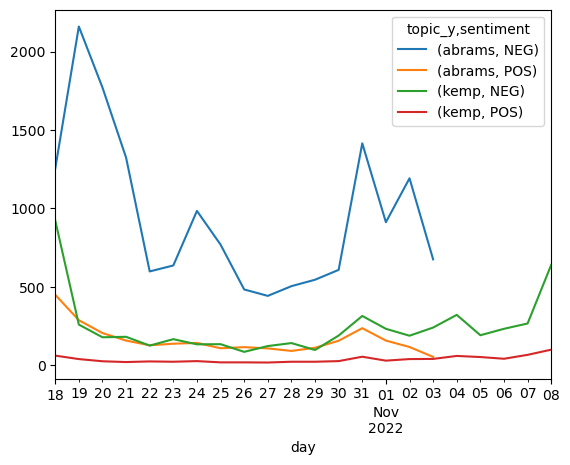

In [27]:
# Time Series Plot
sentiment_candidate_df = sentiment_df[sentiment_df['topic'].isin(['kemp', 'abrams'])]
sentiment_candidate_df = sentiment_candidate_df[sentiment_candidate_df['sentiment'] != 'NEU']
sentiment_candidate_df = sentiment_candidate_df.groupby(['day', 'topic', 'sentiment'], as_index=False).size()
pd.DataFrame(sentiment_candidate_df.pivot(index="day", columns=["topic", "sentiment"], values="size")).plot()

<AxesSubplot:xlabel='day'>

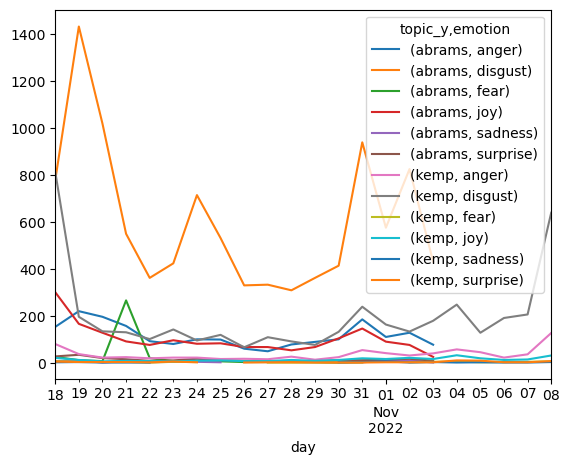

In [26]:
# Time Series Plot
emotion_candidate_df = sentiment_df[sentiment_df['topic'].isin(['kemp', 'abrams'])]
emotion_candidate_df = emotion_candidate_df[emotion_candidate_df['emotion'] != 'others']
emotion_candidate_df = emotion_candidate_df.groupby(['day', 'topic', 'emotion'], as_index=False).size()
pd.DataFrame(emotion_candidate_df.pivot(index="day", columns=["topic", "emotion"], values="size")).plot()